In [4]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()

df = pd.read_csv('file.csv')


Saving file.csv to file.csv


In [5]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


заменим строки на числа, чтобы нейросеть смогла с ними работать

In [6]:
from sklearn.preprocessing import LabelEncoder
reg = LabelEncoder()
reg.fit(df['region'])
df['region'] = reg.transform(df['region'])
dep = LabelEncoder()
dep.fit(df['department'])
df['department'] = dep.transform(df['department'])
gen = LabelEncoder()
gen.fit(df['gender'])
df['gender'] = gen.transform(df['gender'])
rc = LabelEncoder()
rc.fit(df['recruitment_channel'])
df['recruitment_channel'] = rc.transform(df['recruitment_channel'])
edu = LabelEncoder()
edu.fit(df['education'])
df['education'] = edu.transform(df['education'])
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [7]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

пропуски есть только в previous_year_rating, заполним средним значением по столбцу

In [8]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mean())
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

идем дальше, пропусков больше нет

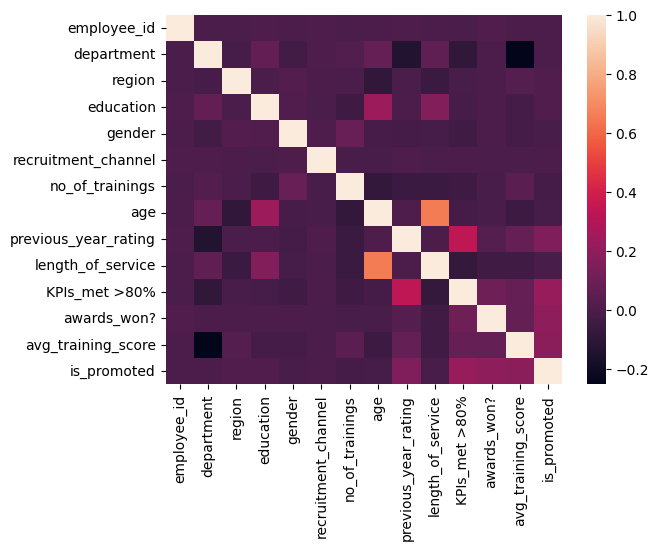

In [9]:
plt.figure()
sns.heatmap(df.corr())
plt.show()

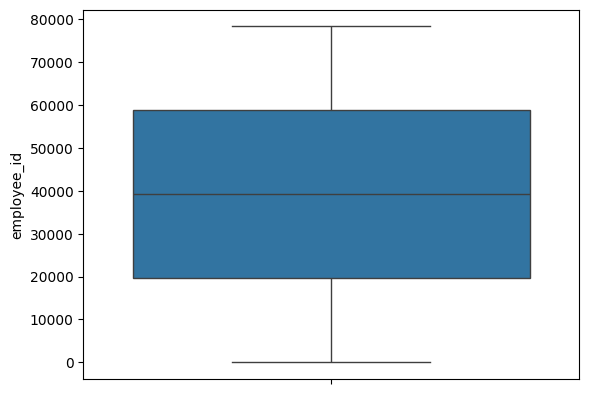

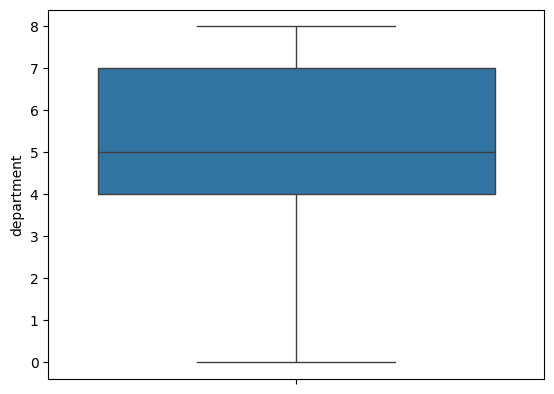

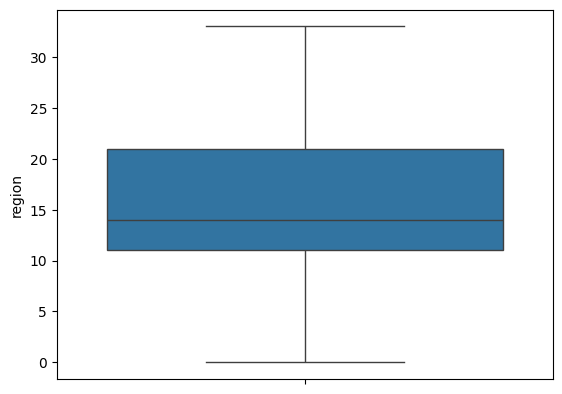

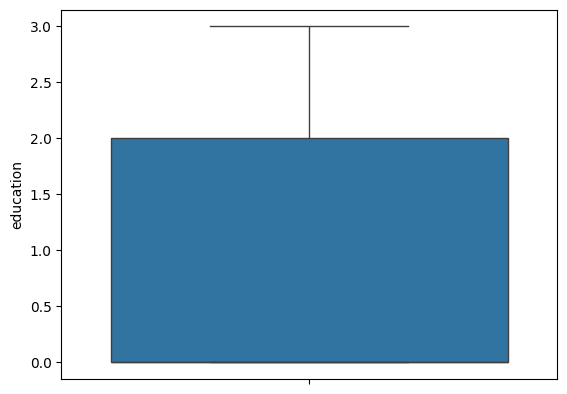

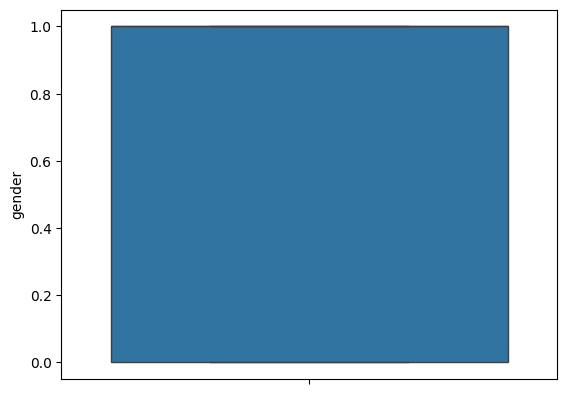

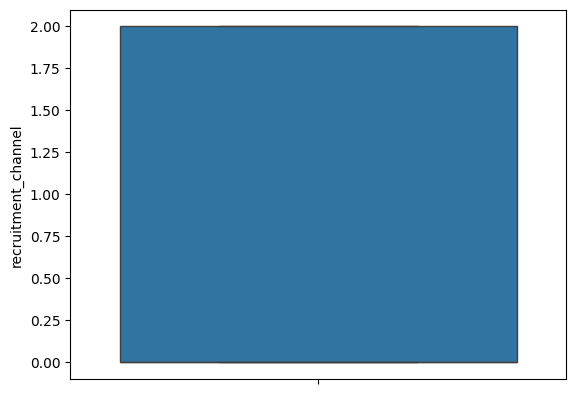

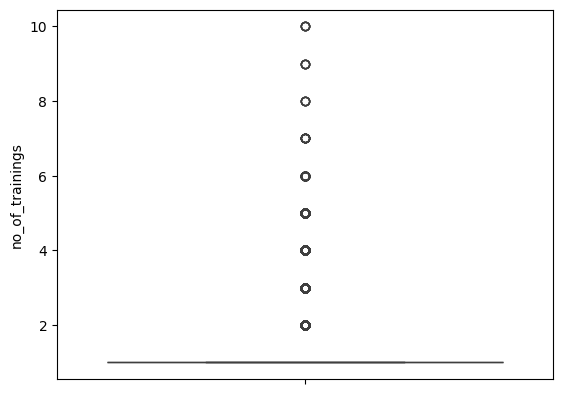

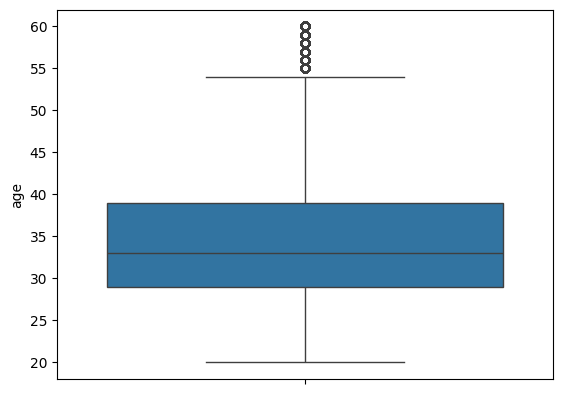

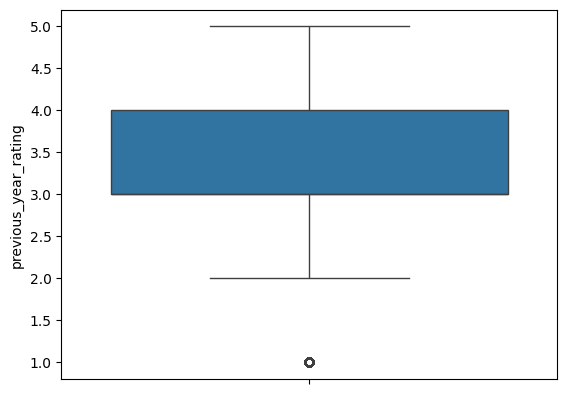

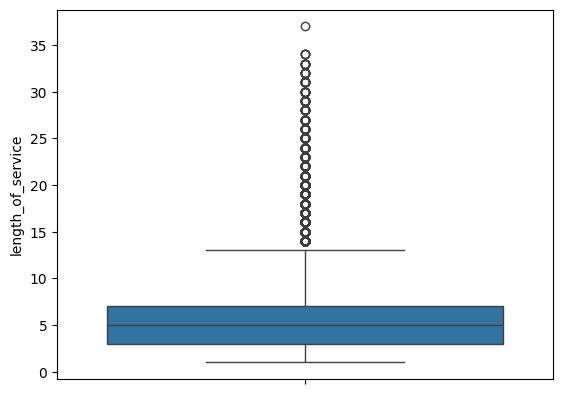

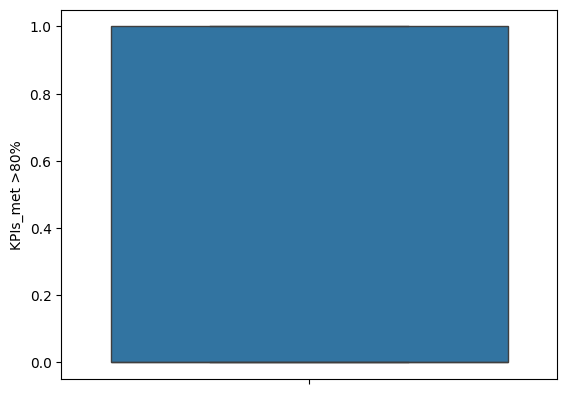

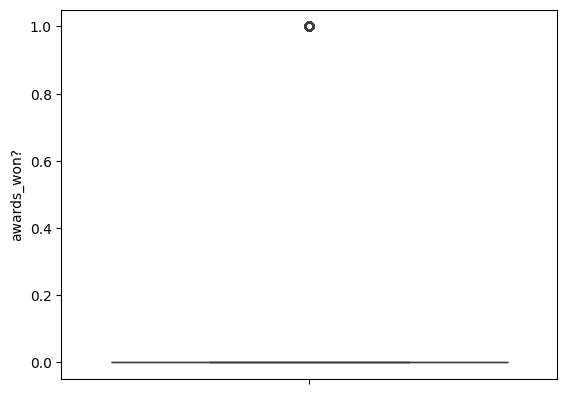

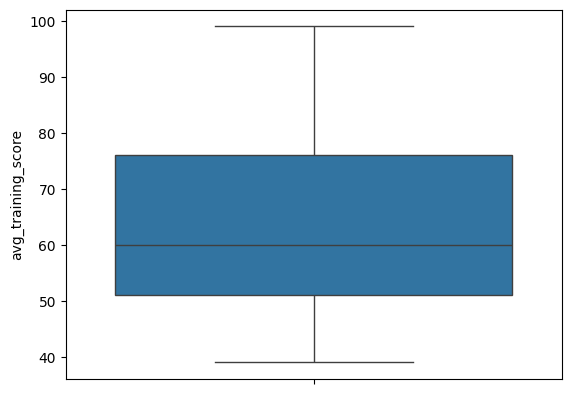

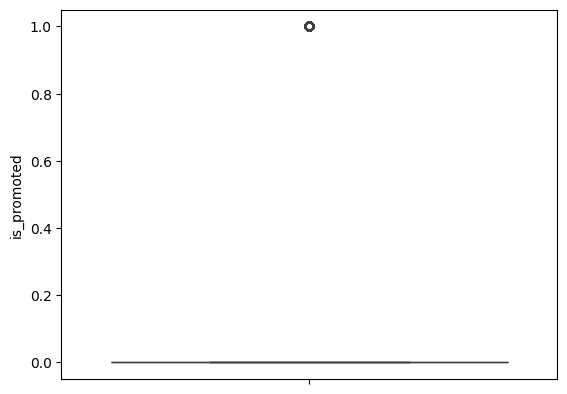

In [12]:
for i in df:
  plt.figure()
  sns.boxplot(data=df[i])
  plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
x = df.drop(['is_promoted'], axis=1)
y = df['is_promoted']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [20]:
model.coef_

array([[-4.84963822e-06, -4.75641712e-02, -1.57731107e-02,
         1.88659126e-02, -2.18376652e-02, -1.89187954e-02,
        -4.66830929e-02, -1.11393376e-01,  7.09177484e-02,
         1.22118690e-01,  7.32560646e-02,  2.24414612e-02,
         1.84126766e-02]])

неприятные коэффиценты в уравнении

In [21]:
prediction = model.predict(x_test)
print(accuracy_score(y_test, prediction))

0.9139755519065864


Вероятность предсказания 0.91 - оч крутой результат

In [26]:
from sklearn.metrics import confusion_matrix

conf_matr = confusion_matrix(y_test, prediction)
print(conf_matr)

[[10019     0]
 [  943     0]]


In [24]:
tn, fp, fn, tp = conf_matr.ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 10019
FP: 0
FN: 943
TP: 0


In [27]:
(tp+tn)/(tp+tn+fn+fp)

0.9139755519065864

еще раз получили то же самое